## Exercise 1 - Depth map to point cloud
* Load the RGB image and depth map, and use them to generate a colored point cloud (see this Open3D tutorial for pointers.) You can assume a pinhole camera model with the following intrinsic matrix:
[[572.4114, 0.0, 325.2611], [ 0.0, 573.57043, 242.04899], [ 0.0, 0.0, 1.0]]
* Visualize the resulting point cloud and save it as a file.

* Write a function that returns the 3D coordinate of a given pixel (u,v) using the intrinsic parameters.

* Define a bounding box around an object of your choice in the image, convert the corner locations to 3D coordinates and use them to crop the point cloud. You can use the PointCloud.crop() function in Open3D.

In [58]:
# Importing libraries
import numpy as np
import cv2 as cv
import os
import open3d as o3d
from matplotlib import pyplot as plt

# Defining data paths
data_path = "../Data/"
output_path = "Output/"

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


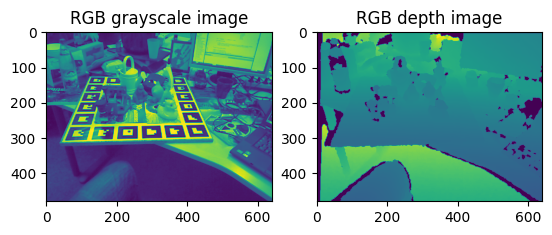

In [59]:
# Reading and visualizing images
color_raw = o3d.io.read_image(data_path+"rgb.png")
depth_raw = o3d.io.read_image(data_path+"depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
print(rgbd_image)

plt.subplot(1, 2, 1)
plt.title('RGB grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('RGB depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [60]:
# Converting the images to point cloud given the camera parameters
intrinsic = o3d.camera.PinholeCameraIntrinsic()
intrinsic.intrinsic_matrix =  [[572.4114, 0.0, 325.2611], [ 0.0, 573.57043, 242.04899], [ 0.0, 0.0, 1.0]]

cam = o3d.camera.PinholeCameraParameters()
cam.intrinsic = intrinsic

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,intrinsic)
print(intrinsic.intrinsic_matrix)
print(cam.extrinsic)

# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])


[[572.4114    0.      325.2611 ]
 [  0.      573.57043 242.04899]
 [  0.        0.        1.     ]]
[[3.69067037e-320 9.84606051e-312 1.02916796e-311 1.17346368e-311]
 [3.62199525e-320 1.35807731e-311 8.25456366e-312 1.17346368e-311]
 [3.60739288e-312 1.35807731e-311 9.84606051e-312 9.90972038e-312]
 [6.68428678e-312 1.35807731e-311 1.17346368e-311 8.25456366e-312]]


PointCloud with 279934 points.

In [63]:
def coords_3d(u,v):
    depth = np.array(rgbd_image.depth)[u,v]
    x_coord = depth * np.array((u-intrinsic.intrinsic_matrix[0][2])/intrinsic.intrinsic_matrix[0][0])
    y_coord = depth * np.array((v-intrinsic.intrinsic_matrix[1][2])/intrinsic.intrinsic_matrix[1][1])
    z_coord = depth * 1
    xyz_3d_coords = [x_coord, y_coord, z_coord]

    return xyz_3d_coords

# Bounding box around yellow glass
# 279,18 Upper Left Corner
# 279,81 Bottom Left Corner
# 328,18 Upper Right Corner
# 328,81 BBottom Right Corner
Leftup_corner = coords_3d(279,18)
Leftbot_corner = coords_3d(279,81)
Rightup_corner = coords_3d(328,18)
Rightbot_corner = coords_3d(328,81)

print(Leftup_corner)
print(Leftbot_corner)
print(Rightup_corner)
print(Rightbot_corner)

#bbox = o3d.geometry.AxisAlignedBoundingBox(min_bound=(-30, 0, -10), max_bound=(10, 20, 10))

# Help https://stackoverflow.com/questions/61269980/open3d-crop-pointcloud-with-polygon-volume
bbox = o3d.geometry.crop_point_cloud(min_bound=(-30, 0, -10), max_bound=(10, 20, 10))

[-0.16203994328932433, -0.7831963209651029, 2.005000114440918]
[-0.0682911465836297, -0.23726188457387626, 0.8450000286102295]
[0.008631861026618953, -0.7046813456667652, 1.8040000200271606]
[0.008770621179981607, -0.5146757474263091, 1.8329999446868896]


AttributeError: module 'open3d.cpu.pybind.geometry' has no attribute 'crop_point_cloud'

In [51]:
# Visualize the point cloud
o3d.visualization.draw_geometries([pcd])

In [52]:
# Save the point cloud as pcd/ply
o3d.io.write_point_cloud(output_path+"point_cloud.pcd", pcd)

# Read the point cloud
pcd = o3d.io.read_point_cloud(output_path+"point_cloud.pcd")
print(pcd)
o3d.visualization.draw_geometries([pcd])

PointCloud with 279934 points.
